#Proprietary content. © Great Learning and IIT Madras. All Rights Reserved. Unauthorized use or distribution prohibited.

# Problem Statement

The objective of the case study is to predict whether the referral would join the organisaiton or not.

You have been hired by the XYZ organisation and you need to estimate the chances of a referrals joining the organisation based on various parameters including the salary offered, their academic and interview performance. This study will help the organisaiton to identify the factors/parameters/features which play an important role to increase the chances of a referral joining the organisaiton.
  
We have a data of 499 referral with  19 features (including both independent and dependent variables)

### Load Required Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.19.2
1.1.5
0.11.0


### Importing data

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv('Referral_Join_Prediction.csv')

### View and describe the data

 View the top 5 records

In [4]:
df.head()

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28,5.0,Delhi,106,89.0,72,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,3,141,EL0,Yes
1,2,26,3.0,Pune,65,63.0,77,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,10,80,ML0,Yes
2,3,23,2.0,Mumbai,45,92.0,85,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,1,60,EL0,No
3,4,29,6.0,Bangalore,126,60.0,95,95.0,67.0,Male,146.0,31.30,9.13,23.48,9.0,3,142,ML0,Yes
4,5,26,3.0,Mumbai,65,92.0,70,80.0,92.0,Female,83.0,25.65,30.43,16.52,7.0,4,89,EL0,Yes


View the bottom 5 records

In [5]:
df.tail()

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
494,495,21,1.0,Pune,25,81.0,77,77.0,91.0,Male,42.0,19.13,16.09,6.52,9.0,8,40,EL0,Yes
495,496,21,1.0,Mumbai,25,74.0,95,67.0,81.0,Female,100.0,3.48,13.04,29.13,9.0,3,40,EL0,Yes
496,497,29,7.0,Mumbai,146,94.0,92,89.0,71.0,Male,200.0,38.70,5.22,39.57,9.0,5,161,EL0,Yes
497,498,30,7.0,Mumbai,143,64.0,89,61.0,88.0,Female,160.0,38.70,37.83,6.52,7.0,5,158,EL0,Yes
498,499,30,8.0,Bangalore,144,67.0,72,81.0,60.0,Female,200.0,33.48,20.43,1.74,4.0,6,159,EE0,No


Shape

In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  499 
no. of columns:  19


Retreive the list of fields along with their data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_preferred_city              499 non-null    object 
 4   referral_current_salary              499 non-null    int64  
 5   referral_10_th_marks                 498 non-null    float64
 6   referral_12th_marks                  499 non-null    int64  
 7   referral_graduation_marks            498 non-null    float64
 8   referral_post_grad_marks             498 non-null    float64
 9   referral_gender                      499 non-null    object 
 10  referral_expected_sal                497 non-null    float64
 11  referral_aptitude_numerical_scor

In [8]:
df.describe()

,referral_id,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_verbal_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,499.000000,499.000000,499.000000,499.000000,498.000000,499.000000,498.000000,498.000000,497.000000,489.000000,498.000000,499.000000,499.000000
mean,250.000000,27.020040,4.053307,86.472946,77.295181,77.478958,77.096386,78.269076,108.692153,21.840491,5.732932,5.651303,102.006012
std,144.193157,2.811979,2.609814,52.566584,11.128083,10.932113,10.812223,10.478487,58.722281,12.338425,2.922706,5.500516,52.619704
min,1.000000,20.000000,1.000000,25.000000,-1.000000,12.000000,-1.000000,60.000000,40.000000,0.430000,1.000000,1.000000,40.000000
25%,125.500000,25.000000,2.000000,45.000000,68.000000,69.000000,68.000000,69.000000,62.000000,11.740000,3.000000,3.000000,60.000000
50%,250.000000,27.000000,4.000000,85.000000,78.000000,77.000000,77.000000,78.000000,103.000000,20.870000,6.000000,5.000000,101.000000
75%,374.500000,29.000000,6.000000,126.000000,87.000000,87.000000,86.000000,88.750000,143.000000,32.610000,8.000000,8.000000,141.000000
max,499.000000,65.000000,42.000000,853.000000,103.000000,95.000000,104.000000,101.000000,870.000000,43.480000,10.000000,111.000000,868.000000


##### Observation:

Data has been loaded correctly into the pandas dataframe 

There are 499 rows and 19 features

There are missing values in 'referral_exp_in_years', 'referral_current_salary', 'referral_10_th_marks', 'referral_post_grad_marks' etc.

'referral_aptitude_numerical_score' and 'referral_aptitude_reasoning_score' are categorised as object type. However based on the values available in this feature/column, it should be numeric.

'referral_10_th_marks' and 'referral_graduation_marks' have minimu value as '-1' which need to checked

### Data Pre-processing

#### Treat BAD Data

In [9]:
## Let's print the unique count of the above two variables to understand the wrong data points
df['referral_aptitude_numerical_score'].unique()

array(['10.00', '6.09', '41.74', '31.30', '25.65', '38.70', '30.43',
       '5.65', '18.70', '23.04', '27.39', '28.26', '32.61', '40.00',
       '24.78', '0.87', '27.83', '18.26', '20.87', '6.52', '21.74',
       '4.78', '26.96', '39.13', '3.04', '13.48', '33.91', '3.48',
       '15.65', '13.91', '38.26', '3.91', '28.70', '23.48', '10.43',
       '8.26', '39.57', '7.39', '30.87', '5.22', '12.61', '16.96',
       '34.35', '33.04', '10.87', '4.35', '35.65', '16.52', '20.43',
       '36.52', '40.43', '7.83', '6.96', '22.17', '34.78', '33.48',
       '43.48', '0.43', '17.39', '9.13', '29.57', '19.13', '17.83',
       '37.83', '36.09', '23.91', '36.96', '19.57', '31.74', '22.61',
       '12.17', '37.39', '14.78', '30.00', '11.74', '35.22', '2.61',
       '40.87', '42.61', '29.13', '?', '9.57', '43.04', '13.04', '25.22',
       '1.74', '15.22', '11.30', '32.17', '14.35', '20.00', nan, '2.17',
       '26.52', '26.09', '1.30', '8.70', '41.30', '16.09', '42.17',
       '24.35'], dtype=object)

In [10]:
## So we have "?" in the feature. Let's look at the second feature as well

In [11]:
df['referral_aptitude_reasoning_score'].unique()

array(['?', '20.87', '40.00', '23.48', '16.52', '32.61', '18.26', '2.50',
       '36.52', '3.04', '38.70', '26.52', '22.61', '14.35', '0.87',
       '13.04', '39.13', '34.35', '43.48', '20.43', '25.22', '37.83',
       '3.91', '28.26', '15.22', '15.65', '35.22', '17.39', '24.78',
       '33.04', '42.61', '31.74', '21.74', '6.09', '2.17', '8.70',
       '41.30', '26.09', '23.91', '27.83', '9.57', '10.43', '40.87',
       '12.17', '6.96', '33.48', '12.61', '42.17', '6.52', '2.61',
       '23.04', '20.00', '7.39', '4.35', '25.65', '31.30', '30.43',
       '5.22', '10.00', '37.39', '27.39', '0.23', '26.96', '34.78',
       '13.48', '19.13', '8.26', '24.35', '21.30', '0.67', '0.99',
       '29.57', '78.00', '36.96', '19.57', '36.09', '38.26', '28.70',
       '69.67', '33.91', '10.87', '0.43', '89.00', '18.70', '13.91', nan,
       '32.17', '7.83', '40.43', '16.09', '43.04', '30.00', '39.57',
       '29.13', '41.74', '11.74', '22.17', '16.96', '3.48', '35.65',
       '30.87', '4.78', '1.74',

In [12]:
## So we have "?" in this feature as well. 

'referral_aptitude_reasoning_score' and 'referral_aptitude_numerical_score' are currently identified as 'object' datatype. Hence, we cannot retrieve the mean or median value of these fields to replace the bad data.

Hence, first replace ? with Null

In [13]:
df['referral_aptitude_reasoning_score'] = df['referral_aptitude_reasoning_score'].replace('?',np.NaN)
df['referral_aptitude_numerical_score'] = df['referral_aptitude_numerical_score'].replace('?',np.NaN)

In [14]:
df['referral_aptitude_reasoning_score'] = df['referral_aptitude_reasoning_score'].astype('float64')
df['referral_aptitude_numerical_score'] = df['referral_aptitude_numerical_score'].astype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_preferred_city              499 non-null    object 
 4   referral_current_salary              499 non-null    int64  
 5   referral_10_th_marks                 498 non-null    float64
 6   referral_12th_marks                  499 non-null    int64  
 7   referral_graduation_marks            498 non-null    float64
 8   referral_post_grad_marks             498 non-null    float64
 9   referral_gender                      499 non-null    object 
 10  referral_expected_sal                497 non-null    float64
 11  referral_aptitude_numerical_scor

We observe that both 'referral_aptitude_reasoning_score' and 'referral_aptitude_numerical_score' fields are now identified as 'float64' datatype

#### Treat Anomalies

Lets check the anomaly observed in 'referral_10_th_marks','referral_graduation_marks' 

Lets assume that the marks have to atleast 35

In [16]:
df[df['referral_10_th_marks'] < 35]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
89,90,27,4.0,Bangalore,85,-1.0,81,93.0,86.0,Female,103.0,31.74,6.52,30.43,10.0,3,101,EL0,Yes


In [17]:
df[df['referral_graduation_marks'] < 35]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
270,271,29,6.0,Bangalore,126,82.0,88,-1.0,64.0,Male,143.0,10.43,27.39,27.83,1.0,6,141,ML0,No


From above records we observe that '-1' has been enterd maybe because the data was not available. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.

Let's assume 10th Marks are almost same as 12th marks and impute the same

In [18]:
marks_12th = df[df['referral_10_th_marks'] < 35]['referral_12th_marks'].values[0]
marks_12th

81

In [19]:
df['referral_10_th_marks'] = df['referral_10_th_marks'].replace(to_replace=-1,value=marks_12th)

In [20]:
df.iloc[89]

referral_id                                   90
referral_age                                  27
referral_exp_in_years                          4
referral_preferred_city                Bangalore
referral_current_salary                       85
referral_10_th_marks                          81
referral_12th_marks                           81
referral_graduation_marks                     93
referral_post_grad_marks                      86
referral_gender                           Female
referral_expected_sal                        103
referral_aptitude_numerical_score          31.74
referral_aptitude_verbal_score              6.52
referral_aptitude_reasoning_score          30.43
referral_Management_Interview_score           10
referral_HR_Interview_score                    3
Salary offered                               101
Emp_Salary_Grade                             EL0
Joined                                       Yes
Name: 89, dtype: object

In [21]:
df['referral_10_th_marks'].describe()

count    498.000000
mean      77.459839
std       10.559375
min       60.000000
25%       68.000000
50%       78.000000
75%       87.000000
max      103.000000
Name: referral_10_th_marks, dtype: float64

In [22]:
df['referral_graduation_marks'].describe()

count    498.000000
mean      77.096386
std       10.812223
min       -1.000000
25%       68.000000
50%       77.000000
75%       86.000000
max      104.000000
Name: referral_graduation_marks, dtype: float64

In [23]:
df['referral_graduation_marks'] = df['referral_graduation_marks'].replace(-1,df['referral_graduation_marks'].mean())

In [24]:
df.iloc[270]

referral_id                                  271
referral_age                                  29
referral_exp_in_years                          6
referral_preferred_city                Bangalore
referral_current_salary                      126
referral_10_th_marks                          82
referral_12th_marks                           88
referral_graduation_marks                77.0964
referral_post_grad_marks                      64
referral_gender                             Male
referral_expected_sal                        143
referral_aptitude_numerical_score          10.43
referral_aptitude_verbal_score             27.39
referral_aptitude_reasoning_score          27.83
referral_Management_Interview_score            1
referral_HR_Interview_score                    6
Salary offered                               141
Emp_Salary_Grade                             ML0
Joined                                        No
Name: 270, dtype: object

In [25]:
df['referral_graduation_marks'].describe()

count    498.000000
mean      77.253206
std       10.227796
min       60.000000
25%       68.000000
50%       77.000000
75%       86.000000
max      104.000000
Name: referral_graduation_marks, dtype: float64

Lets check the unique levels available in the object type variable

We have 4 categorical variables:

referral_preferred_city

referral_gender        

Emp_Salary_Grade       

Joined

In [26]:
df['referral_preferred_city'].value_counts()

Mumbai       232
Bangalore    142
Delhi         93
Pune          32
Name: referral_preferred_city, dtype: int64

In [27]:
df['referral_gender'].value_counts()

Male      260
Female    238
?           1
Name: referral_gender, dtype: int64

In [28]:
df['Emp_Salary_Grade'].value_counts()

EL0    221
ML0    187
EE0     91
Name: Emp_Salary_Grade, dtype: int64

In [29]:
df['Joined'].value_counts()

No     261
Yes    238
Name: Joined, dtype: int64

In [30]:
## As it is just 1 record, we can go ahead and replace it with mode value
df['referral_gender'] = df['referral_gender'].replace('?',df['referral_gender'].mode()[0])

#### Treat Missing Values

In [31]:
df.isnull().sum()

referral_id                             0
referral_age                            0
referral_exp_in_years                   0
referral_preferred_city                 0
referral_current_salary                 0
referral_10_th_marks                    1
referral_12th_marks                     0
referral_graduation_marks               1
referral_post_grad_marks                1
referral_gender                         0
referral_expected_sal                   2
referral_aptitude_numerical_score       4
referral_aptitude_verbal_score         10
referral_aptitude_reasoning_score       8
referral_Management_Interview_score     1
referral_HR_Interview_score             0
Salary offered                          0
Emp_Salary_Grade                        0
Joined                                  0
dtype: int64

In [32]:
## Let's start with referral_aptitude_verbal_score  feature which has 10 missing values

<AxesSubplot:xlabel='referral_aptitude_verbal_score'>

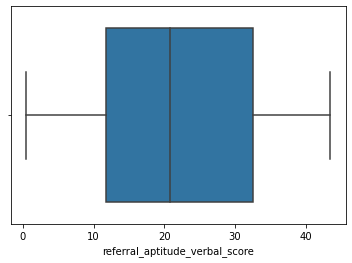

In [33]:
sns.boxplot(x='referral_aptitude_verbal_score', data=df) 

Since this feature has no possible outliers , we can use mean to impute null values.


In [34]:
df.referral_aptitude_verbal_score.describe()

count    489.000000
mean      21.840491
std       12.338425
min        0.430000
25%       11.740000
50%       20.870000
75%       32.610000
max       43.480000
Name: referral_aptitude_verbal_score, dtype: float64

In [35]:
df.referral_aptitude_verbal_score=df.referral_aptitude_verbal_score.fillna(df.referral_aptitude_verbal_score.mean())

In [36]:
## For other fields lets impute 'median'  

In [37]:
df.isnull().sum()

referral_id                            0
referral_age                           0
referral_exp_in_years                  0
referral_preferred_city                0
referral_current_salary                0
referral_10_th_marks                   1
referral_12th_marks                    0
referral_graduation_marks              1
referral_post_grad_marks               1
referral_gender                        0
referral_expected_sal                  2
referral_aptitude_numerical_score      4
referral_aptitude_verbal_score         0
referral_aptitude_reasoning_score      8
referral_Management_Interview_score    1
referral_HR_Interview_score            0
Salary offered                         0
Emp_Salary_Grade                       0
Joined                                 0
dtype: int64

In [38]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [39]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_current_salary              499 non-null    int64  
 4   referral_10_th_marks                 498 non-null    float64
 5   referral_12th_marks                  499 non-null    int64  
 6   referral_graduation_marks            498 non-null    float64
 7   referral_post_grad_marks             498 non-null    float64
 8   referral_expected_sal                497 non-null    float64
 9   referral_aptitude_numerical_score    495 non-null    float64
 10  referral_aptitude_verbal_score       499 non-null    float64
 11  referral_aptitude_reasoning_scor

In [40]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   referral_preferred_city  499 non-null    object
 1   referral_gender          499 non-null    object
 2   Emp_Salary_Grade         499 non-null    object
 3   Joined                   499 non-null    object
dtypes: object(4)
memory usage: 15.7+ KB


In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='median')

In [42]:
imr = imputer.fit(df_num)
df_num = pd.DataFrame(imr.transform(df_num), columns=df_num.columns)

In [43]:
df_num.isnull().sum()

referral_id                            0
referral_age                           0
referral_exp_in_years                  0
referral_current_salary                0
referral_10_th_marks                   0
referral_12th_marks                    0
referral_graduation_marks              0
referral_post_grad_marks               0
referral_expected_sal                  0
referral_aptitude_numerical_score      0
referral_aptitude_verbal_score         0
referral_aptitude_reasoning_score      0
referral_Management_Interview_score    0
referral_HR_Interview_score            0
Salary offered                         0
dtype: int64

In [44]:
df_num.describe()

,referral_id,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,27.020040,4.053307,86.472946,77.460922,77.478958,77.252698,78.268537,108.669339,20.971363,21.840491,23.706713,5.733467,5.651303,102.006012
std,144.193157,2.811979,2.609814,52.566584,10.548795,10.932113,10.217528,10.467968,58.605352,12.507253,12.213917,13.391275,2.919795,5.500516,52.619704
min,1.000000,20.000000,1.000000,25.000000,60.000000,12.000000,60.000000,60.000000,40.000000,0.430000,0.430000,0.230000,1.000000,1.000000,40.000000
25%,125.500000,25.000000,2.000000,45.000000,68.000000,69.000000,68.000000,69.000000,62.000000,10.000000,11.740000,13.040000,3.000000,3.000000,60.000000
50%,250.000000,27.000000,4.000000,85.000000,78.000000,77.000000,77.000000,78.000000,103.000000,20.430000,21.740000,23.480000,6.000000,5.000000,101.000000
75%,374.500000,29.000000,6.000000,126.000000,87.000000,87.000000,86.000000,88.500000,143.000000,31.955000,32.610000,34.350000,8.000000,8.000000,141.000000
max,499.000000,65.000000,42.000000,853.000000,103.000000,95.000000,104.000000,101.000000,870.000000,43.480000,43.480000,89.000000,10.000000,111.000000,868.000000


In [45]:
df_new = pd.concat([df_num, df_cat], axis=1, join='inner')

In [46]:
df_new.head()

,referral_id,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined
0,1.0,28.0,5.0,106.0,89.0,72.0,87.0,83.0,123.0,10.00,33.04,23.48,10.0,3.0,141.0,Delhi,Male,EL0,Yes
1,2.0,26.0,3.0,65.0,63.0,77.0,94.0,85.0,83.0,6.09,27.39,20.87,10.0,10.0,80.0,Pune,Male,ML0,Yes
2,3.0,23.0,2.0,45.0,92.0,85.0,84.0,72.0,62.0,41.74,2.61,40.00,2.0,1.0,60.0,Mumbai,Male,EL0,No
3,4.0,29.0,6.0,126.0,60.0,95.0,95.0,67.0,146.0,31.30,9.13,23.48,9.0,3.0,142.0,Bangalore,Male,ML0,Yes
4,5.0,26.0,3.0,65.0,92.0,70.0,80.0,92.0,83.0,25.65,30.43,16.52,7.0,4.0,89.0,Mumbai,Female,EL0,Yes


In [47]:
df_new.shape

(499, 19)

In [48]:
df = df_new

In [49]:
# If we have a large dataset and there are very few records with null values we can choose to drop these records 
# using the below command
# df=df.dropna()

#### Checking for Duplicates

In [50]:
# Are there any duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [51]:
# If there are duplicates we can drop them using the below command
df.drop_duplicates(inplace=True)

In [52]:
df.shape

(499, 19)

### Data Visualization

#### Univariate Analysis

In [53]:
df[['referral_exp_in_years','referral_current_salary']].describe()

,referral_exp_in_years,referral_current_salary
count,499.000000,499.000000
mean,4.053307,86.472946
std,2.609814,52.566584
min,1.000000,25.000000
25%,2.000000,45.000000
50%,4.000000,85.000000
75%,6.000000,126.000000
max,42.000000,853.000000


#### Insights:

referral_exp_in_years ranges from a minimum of 1 year to maximum of 42 years

75% of the referrals have less than or equal to 6 years experience

Mean salary of referrals is 86.44 which is higher than the median value indicating that the ditribution is right tailed


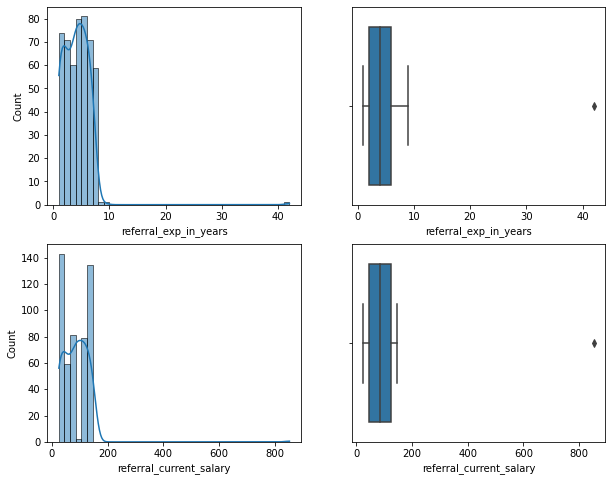

In [54]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['referral_exp_in_years'], kde=True, ax=axes[0][0])
sns.boxplot(x='referral_exp_in_years', data=df, ax=axes[0][1])
sns.histplot(df['referral_current_salary'] , kde=True, ax=axes[1][0])
sns.boxplot(x='referral_current_salary', data=df , ax=axes[1][1])
plt.show()

#### Insights:

Both referral_exp_in_years and referral_current_salary have ouliers in upper values.



In [55]:
## Categorical Variable

In [56]:
df['referral_preferred_city'].value_counts(normalize=True)

Mumbai       0.464930
Bangalore    0.284569
Delhi        0.186373
Pune         0.064128
Name: referral_preferred_city, dtype: float64

<AxesSubplot:xlabel='referral_preferred_city', ylabel='count'>

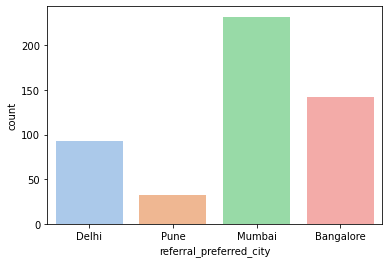

In [57]:
 sns.countplot(x='referral_preferred_city', data=df, palette='pastel')

#### Insights:

Maximum referrals i.e. around 46% referrals are coming from Mumbai

Only 6% referrals are from Pune

####  Bivariate Analysis

In [58]:
## Numeric vs Numeric

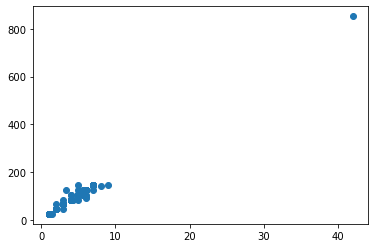

In [59]:
plt.scatter(df['referral_exp_in_years'],df['referral_current_salary'])

#### Insights:

From the above plot we see that as the referral experience increases the salary is also increasing showing a positive relationship

In [60]:
## Categorical vs Categorical

<AxesSubplot:xlabel='Emp_Salary_Grade', ylabel='count'>

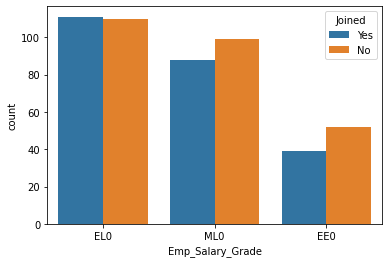

In [61]:
sns.countplot(x='Emp_Salary_Grade', hue='Joined', data=df)

In [62]:
pd.crosstab(df['Emp_Salary_Grade'], df['Joined'], margins=True, normalize = True)

Joined,No,Yes,All
Emp_Salary_Grade,,,
EE0,0.104208,0.078156,0.182365
EL0,0.220441,0.222445,0.442886
ML0,0.198397,0.176353,0.374749
All,0.523046,0.476954,1.000000


### Insights:

44.29% referrals are from the EL0 grade 

There is no major difference in the referrals joining or not joining based on gardes

In [63]:
## Categorical vs Numeric

<AxesSubplot:xlabel='Joined', ylabel='referral_expected_sal'>

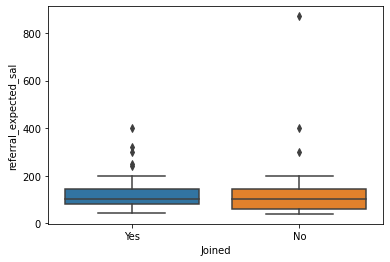

In [64]:
fig_dims = (12, 5)
sns.boxplot(x='Joined', y='referral_expected_sal', data=df)

#### Insights:

Median value of the expected salary for referrals who have joined is almost same as referrals who have not joined. However, there is a major difference in the range of expected salary for the 2 categories.

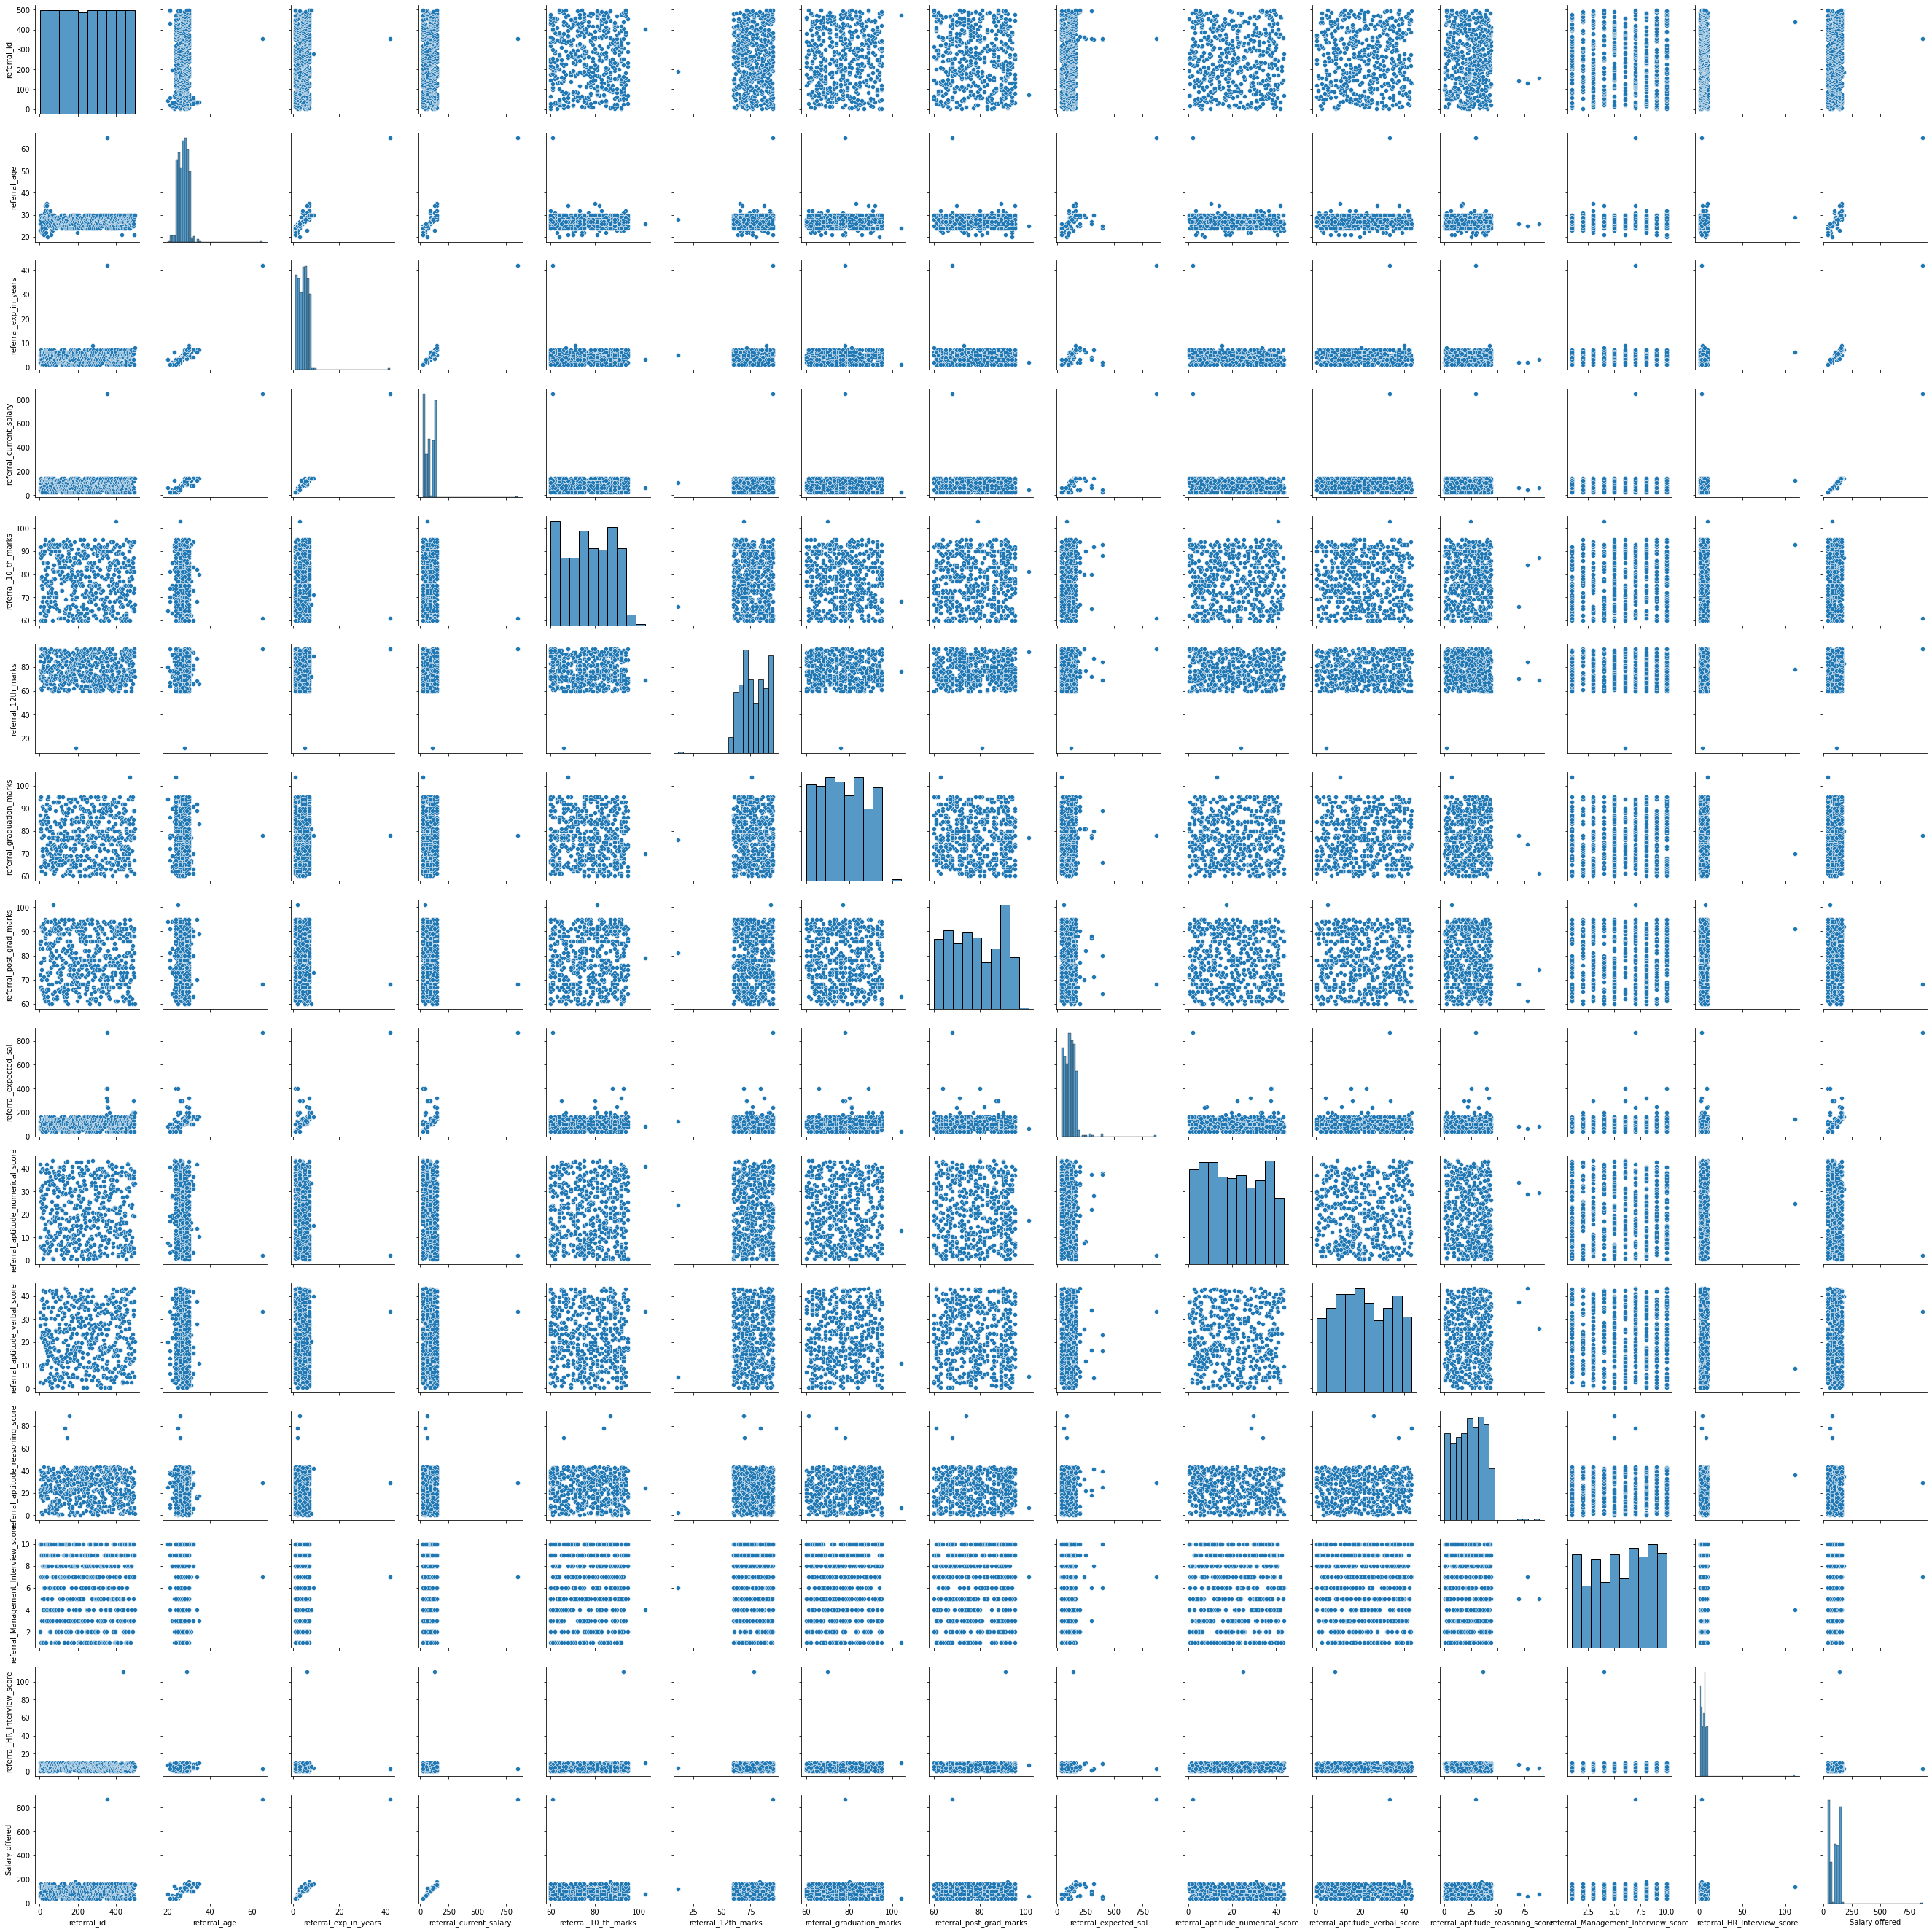

In [65]:
sns.pairplot(df)

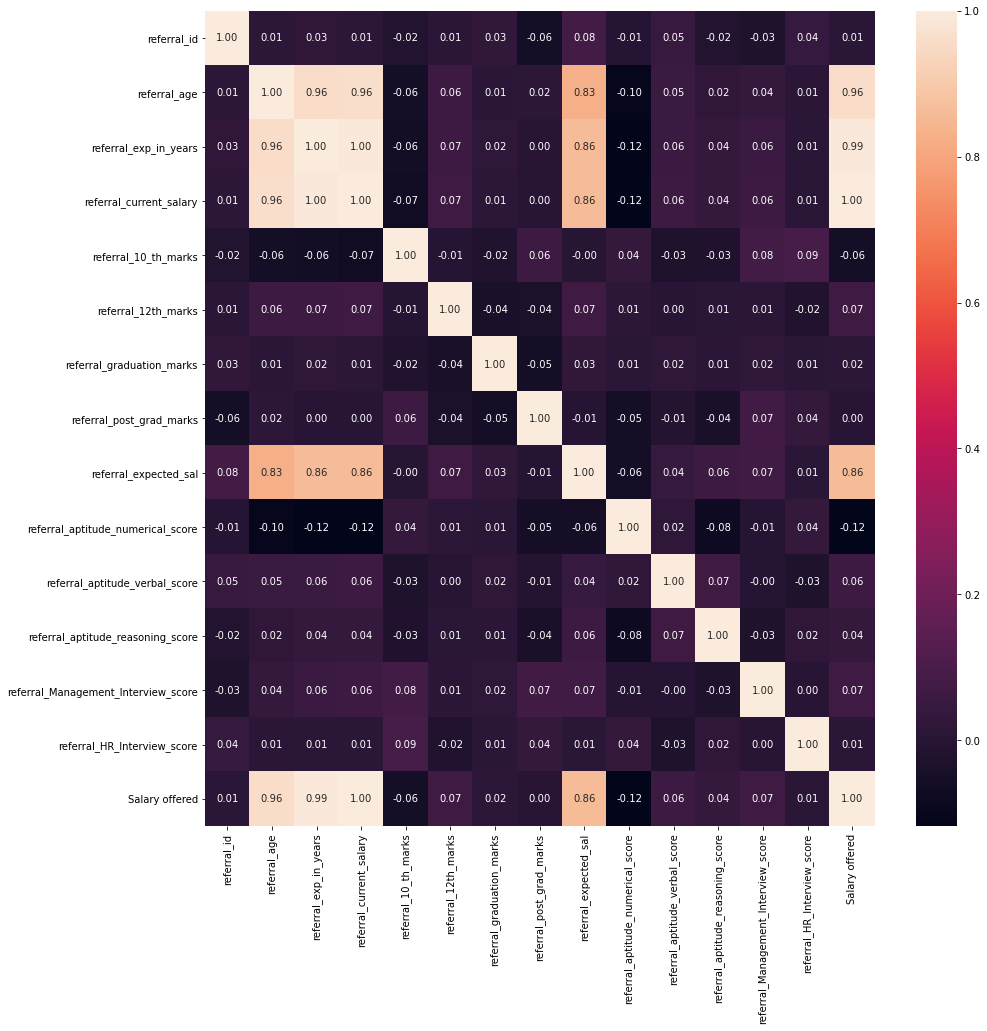

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

### Insights

There is a strong correlation observed between few fields. 'Salary offered' is highly correlated to 'referral_age' and 'referral_exp_in_years'

Also, 'Salary offered' shows high correlation with 'referral_expected_sal' 



#### Multivariate Analysis

<AxesSubplot:xlabel='Joined', ylabel='referral_age'>

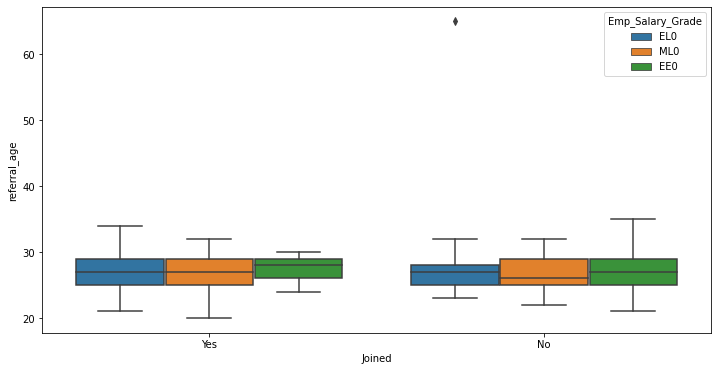

In [67]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Joined', y='referral_age', hue='Emp_Salary_Grade',data=df)

#### Insights:

Median age of referrals who have joined is higher for EE0 grade compared to other grades


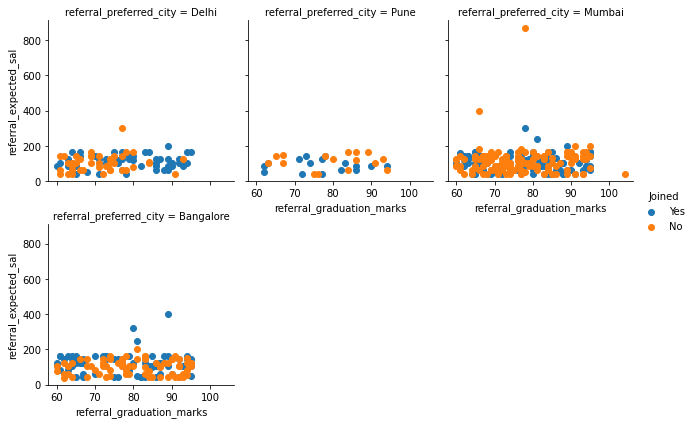

In [68]:
g = sns.FacetGrid(df, col="referral_preferred_city", hue='Joined',col_wrap=3, height=3)
g = g.map(plt.scatter, "referral_graduation_marks", 'referral_expected_sal')
g.add_legend()

#### Insights

There are more referrals from Mumbai city

Porportion of referrals who have joined and not joined seem to be the same across cities


### Data Preparation

#### Scaling 

In [69]:
## Dropping the ID fearure before we scale numeric values as the same will not add any value in model building
df.drop(labels='referral_id',axis=1,inplace=True)
df.head()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined
0,28.0,5.0,106.0,89.0,72.0,87.0,83.0,123.0,10.00,33.04,23.48,10.0,3.0,141.0,Delhi,Male,EL0,Yes
1,26.0,3.0,65.0,63.0,77.0,94.0,85.0,83.0,6.09,27.39,20.87,10.0,10.0,80.0,Pune,Male,ML0,Yes
2,23.0,2.0,45.0,92.0,85.0,84.0,72.0,62.0,41.74,2.61,40.00,2.0,1.0,60.0,Mumbai,Male,EL0,No
3,29.0,6.0,126.0,60.0,95.0,95.0,67.0,146.0,31.30,9.13,23.48,9.0,3.0,142.0,Bangalore,Male,ML0,Yes
4,26.0,3.0,65.0,92.0,70.0,80.0,92.0,83.0,25.65,30.43,16.52,7.0,4.0,89.0,Mumbai,Female,EL0,Yes


In [70]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['referral_preferred_city', 'referral_gender', 'Emp_Salary_Grade', 'Joined']
['referral_age', 'referral_exp_in_years', 'referral_current_salary', 'referral_10_th_marks', 'referral_12th_marks', 'referral_graduation_marks', 'referral_post_grad_marks', 'referral_expected_sal', 'referral_aptitude_numerical_score', 'referral_aptitude_verbal_score', 'referral_aptitude_reasoning_score', 'referral_Management_Interview_score', 'referral_HR_Interview_score', 'Salary offered']


In [71]:
# Method 1
## Using Zscore for scaling/standardisation
from scipy.stats import zscore
data_scaled=df[num].apply(zscore)

In [72]:
data_scaled.head()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
0,0.348844,0.363108,0.371846,1.094974,-0.501683,0.954936,0.452448,0.244774,-0.878080,0.917867,-0.016947,1.462710,-0.482494,0.741797
1,-0.363112,-0.404000,-0.408900,-1.372236,-0.043856,1.640721,0.643699,-0.438443,-1.191013,0.454815,-0.212046,1.462710,0.791391,-0.418628
2,-1.431047,-0.787553,-0.789752,1.379652,0.688667,0.661028,-0.599431,-0.797132,1.662194,-1.576054,1.217930,-1.279957,-0.846461,-0.799095
3,0.704823,0.746661,0.752697,-1.656914,1.604322,1.738690,-1.077558,0.637623,0.826641,-1.041701,-0.016947,1.119877,-0.482494,0.760820
4,-0.363112,-0.404000,-0.408900,1.379652,-0.684814,0.269151,1.313077,-0.438443,0.374449,0.703962,-0.537210,0.434210,-0.300510,-0.247418


In [73]:
df.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,27.020040,4.053307,86.472946,77.460922,77.478958,77.252698,78.268537,108.669339,20.971363,21.840491,23.706713,5.733467,5.651303,102.006012
std,2.811979,2.609814,52.566584,10.548795,10.932113,10.217528,10.467968,58.605352,12.507253,12.213917,13.391275,2.919795,5.500516,52.619704
min,20.000000,1.000000,25.000000,60.000000,12.000000,60.000000,60.000000,40.000000,0.430000,0.430000,0.230000,1.000000,1.000000,40.000000
25%,25.000000,2.000000,45.000000,68.000000,69.000000,68.000000,69.000000,62.000000,10.000000,11.740000,13.040000,3.000000,3.000000,60.000000
50%,27.000000,4.000000,85.000000,78.000000,77.000000,77.000000,78.000000,103.000000,20.430000,21.740000,23.480000,6.000000,5.000000,101.000000
75%,29.000000,6.000000,126.000000,87.000000,87.000000,86.000000,88.500000,143.000000,31.955000,32.610000,34.350000,8.000000,8.000000,141.000000
max,65.000000,42.000000,853.000000,103.000000,95.000000,104.000000,101.000000,870.000000,43.480000,43.480000,89.000000,10.000000,111.000000,868.000000


In [74]:
data_scaled.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.085749e-16,9.878538e-17,-4.449792e-17,1.435058e-16,5.842576e-16,-7.222012e-16,-1.268191e-16,7.520148e-17,2.749971e-16,-1.184201e-16,-1.860013e-16,1.076850e-16,-2.227677e-17,9.166571e-17
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-2.498982e+00,-1.171107e+00,-1.170604e+00,-1.656914e+00,-5.995608e+00,-1.690234e+00,-1.746936e+00,-1.172901e+00,-1.644004e+00,-1.754718e+00,-1.754894e+00,-1.622791e+00,-8.464606e-01,-1.179563e+00
25%,-7.190903e-01,-7.875531e-01,-7.897520e-01,-8.977723e-01,-7.763793e-01,-9.064798e-01,-8.863075e-01,-7.971315e-01,-8.780803e-01,-8.277956e-01,-7.973413e-01,-9.371240e-01,-4.824935e-01,-7.990954e-01
50%,-7.133833e-03,-2.044594e-02,-2.804869e-02,5.115457e-02,-4.385598e-02,-2.475665e-02,-2.567896e-02,-9.683464e-02,-4.332734e-02,-8.235822e-03,-1.694692e-02,9.137646e-02,-1.185264e-01,-1.913773e-02
75%,7.048227e-01,7.466613e-01,7.526972e-01,9.051887e-01,8.717982e-01,8.569666e-01,9.783877e-01,5.863818e-01,8.790627e-01,8.826257e-01,7.955902e-01,7.770434e-01,4.274243e-01,7.417966e-01
max,1.352004e+01,1.455459e+01,1.459665e+01,2.423472e+00,1.604322e+00,2.620413e+00,2.173705e+00,1.300384e+01,1.801453e+00,1.773487e+00,4.880701e+00,1.462710e+00,1.917173e+01,1.457178e+01


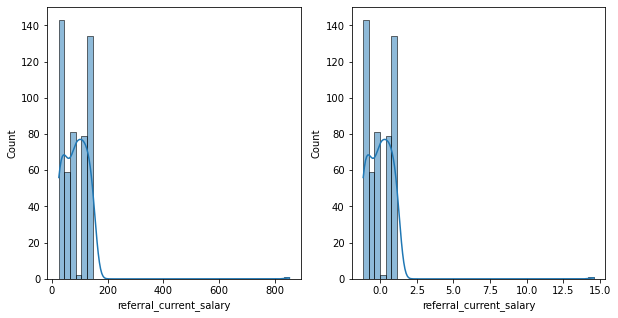

In [75]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['referral_current_salary'] , kde=True, ax=axes[0])
sns.histplot(data_scaled['referral_current_salary'] , kde=True, ax=axes[1])
plt.show()

In [76]:
# Method II
## Using standardScaler for Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[num])
data_standard=scaler.transform(df[num])
data_standard=pd.DataFrame(data_standard, columns=df[num].columns)
data_standard.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.085749e-16,9.878538e-17,-4.449792e-17,1.435058e-16,5.842576e-16,-7.222012e-16,-1.268191e-16,7.520148e-17,2.749971e-16,-1.184201e-16,-1.860013e-16,1.076850e-16,-2.227677e-17,9.166571e-17
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-2.498982e+00,-1.171107e+00,-1.170604e+00,-1.656914e+00,-5.995608e+00,-1.690234e+00,-1.746936e+00,-1.172901e+00,-1.644004e+00,-1.754718e+00,-1.754894e+00,-1.622791e+00,-8.464606e-01,-1.179563e+00
25%,-7.190903e-01,-7.875531e-01,-7.897520e-01,-8.977723e-01,-7.763793e-01,-9.064798e-01,-8.863075e-01,-7.971315e-01,-8.780803e-01,-8.277956e-01,-7.973413e-01,-9.371240e-01,-4.824935e-01,-7.990954e-01
50%,-7.133833e-03,-2.044594e-02,-2.804869e-02,5.115457e-02,-4.385598e-02,-2.475665e-02,-2.567896e-02,-9.683464e-02,-4.332734e-02,-8.235822e-03,-1.694692e-02,9.137646e-02,-1.185264e-01,-1.913773e-02
75%,7.048227e-01,7.466613e-01,7.526972e-01,9.051887e-01,8.717982e-01,8.569666e-01,9.783877e-01,5.863818e-01,8.790627e-01,8.826257e-01,7.955902e-01,7.770434e-01,4.274243e-01,7.417966e-01
max,1.352004e+01,1.455459e+01,1.459665e+01,2.423472e+00,1.604322e+00,2.620413e+00,2.173705e+00,1.300384e+01,1.801453e+00,1.773487e+00,4.880701e+00,1.462710e+00,1.917173e+01,1.457178e+01


In [77]:
# Method III Min-Max method
from sklearn.preprocessing import MinMaxScaler
# build the scaler model
scaler = MinMaxScaler().fit(df[num])
# transform the test test
data_minmax = scaler.transform(df[num])
data_minmax=pd.DataFrame(data_minmax, columns=df[num].columns)
data_minmax.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.156001,0.074471,0.074243,0.406068,0.788903,0.392107,0.445574,0.082734,0.477151,0.497340,0.264467,0.525941,0.042285,0.074886
std,0.062488,0.063654,0.063486,0.245321,0.131712,0.232217,0.255316,0.070609,0.290529,0.283715,0.150854,0.324422,0.050005,0.063550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.024390,0.024155,0.186047,0.686747,0.181818,0.219512,0.026506,0.222300,0.262718,0.144306,0.222222,0.018182,0.024155
50%,0.155556,0.073171,0.072464,0.418605,0.783133,0.386364,0.439024,0.075904,0.464576,0.495006,0.261913,0.555556,0.036364,0.073671
75%,0.200000,0.121951,0.121981,0.627907,0.903614,0.590909,0.695122,0.124096,0.732288,0.747503,0.384364,0.777778,0.063636,0.121981
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Learning

Applying zscore or using StandardScalar give us the same results

It scales the data in such a way that the mean value of the features tends to 0 and the standard deviation tends to 1

Min-Max method ensure that the data scaled to have values in the range 0 to 1

#### Tranformation

In [78]:
df.referral_current_salary.describe()

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: referral_current_salary, dtype: float64

<AxesSubplot:xlabel='referral_current_salary'>

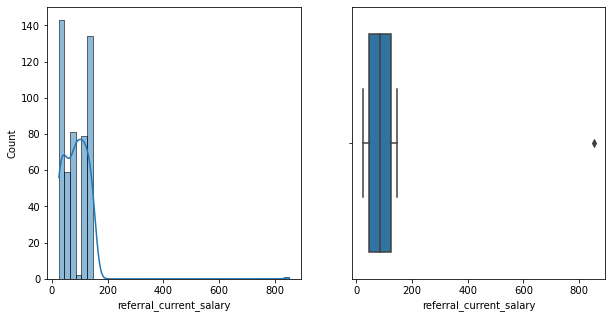

In [79]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.referral_current_salary, kde=True, ax=axs[0]) 
sns.boxplot(x= 'referral_current_salary', data=df, ax=axs[1]) 

In [80]:
print("skeness of referral_current_salary is",df['referral_current_salary'].skew())
print("kurtosis of referral_current_salary is ", df['referral_current_salary'].kurtosis())

skeness of referral_current_salary is 6.184346309755603
kurtosis of referral_current_salary is  89.46603642396403


Skewness assesses the extent to which a variable’s distribution is symmetrical 

Kurtosis is a measure of whether the distribution is too peaked

For an ideal normal distribution (theoretical) Skewness and Kurtosis have to be between -1 to +1 Or we can say that if we are able to reduce the skewness and kurtosis from a very high value to lower values we are able to get the data distirbuted more normally

-0.5366972326623899
-0.25722521778402907


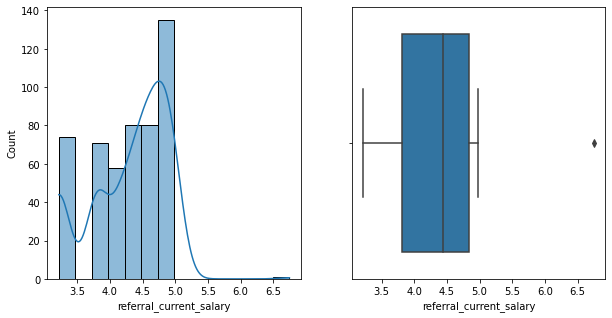

In [81]:
# Using log transformation
print(np.log(df['referral_current_salary']).skew())
print(np.log(df['referral_current_salary']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(np.log(df['referral_current_salary']), kde=True, ax = axs[0])
sns.boxplot(x= np.log(df['referral_current_salary']), ax = axs[1])
plt.show()

0.7524793474615112
7.32123129002615


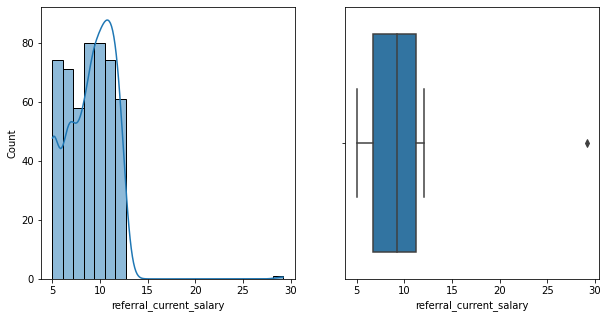

In [82]:
# Using sqrt for transformation
print(np.sqrt(df['referral_current_salary']).skew())
print(np.sqrt(df['referral_current_salary']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(np.sqrt(df['referral_current_salary']), kde=True, ax = axs[0])
sns.boxplot(x=np.sqrt(df['referral_current_salary']), ax = axs[1])
plt.show()

-0.3950105143684113
0.04120887026425146


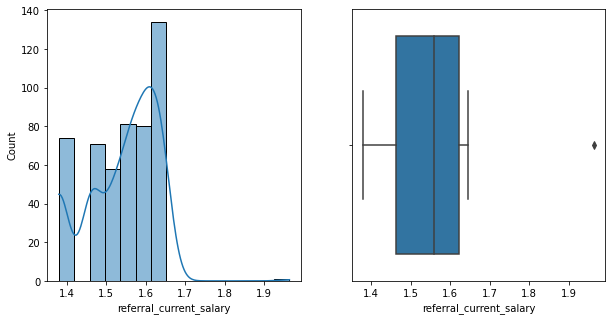

In [83]:
# Using root of 10 for transformation
print((df['referral_current_salary']**0.1).skew())
print((df['referral_current_salary']**0.1).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot((df['referral_current_salary']**0.1), kde=True, ax = axs[0])
sns.boxplot(x=(df['referral_current_salary']**0.1), ax = axs[1])
plt.show()

##### Learning

In situations where our data is highly skewed and the algorithm we plan to use for prediction has a prerequisite that the data has to be normally distributed, above transformations can be applied.

In the above scenario, the transformation with root of 10 has given us best results, so we may choose to transform the data accordingly and check if it has helped in improving the model performance

Note: If continuous variables are being predicted, we need to make a note that the values that will get predicted for the transformed data are also in that form and have to be reversed. i.e. Exponential is inverse of log, square is inverse of square root etc.

#### Outlier Treatment

In [84]:
### Method I - Z Score

In [85]:
# Take backup of 'referral_current_salary' field as 2 other fields to compare output from different methods
df['referral_current_salary1'] = df['referral_current_salary']
df['referral_current_salary2'] = df['referral_current_salary']

In [86]:
df.referral_current_salary.describe()

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: referral_current_salary, dtype: float64

<AxesSubplot:xlabel='referral_current_salary'>

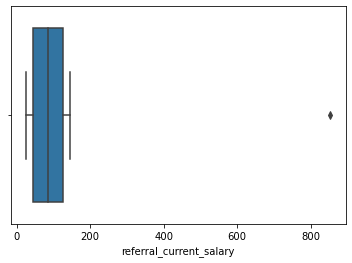

In [87]:
sns.boxplot(x=df.referral_current_salary)

In [88]:
### Method I (Z Score)
df['referral_current_salary_zscore'] = ( df.referral_current_salary - df.referral_current_salary.mean() ) / df.referral_current_salary.std()
df['referral_current_salary_zscore'].describe()

count    4.990000e+02
mean     1.824415e-17
std      1.000000e+00
min     -1.169430e+00
25%     -7.889603e-01
50%     -2.802057e-02
75%      7.519426e-01
max      1.458202e+01
Name: referral_current_salary_zscore, dtype: float64

In [89]:
df[df['referral_current_salary_zscore'] > 3]

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,...,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined,referral_current_salary1,referral_current_salary2,referral_current_salary_zscore
354,65.0,42.0,853.0,61.0,95.0,78.0,68.0,870.0,2.17,33.48,...,7.0,3.0,868.0,Mumbai,Male,EL0,No,853.0,853.0,14.582021


In [90]:
df[df['referral_current_salary_zscore'] < -3]

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,...,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined,referral_current_salary1,referral_current_salary2,referral_current_salary_zscore


In [91]:
df[df['referral_current_salary_zscore'] > 3].referral_current_salary

354    853.0
Name: referral_current_salary, dtype: float64

In [92]:
# Let us calculate the value for referral_current_salary if ZScore has to be 3
referral_current_salary_impute_value = (3*df.referral_current_salary.std()) + df.referral_current_salary.mean()
round(referral_current_salary_impute_value,2)

244.17

In [93]:
list1 = df[df['referral_current_salary_zscore'] > 3].index

In [94]:
df['referral_current_salary'] = np.where(df.index.isin(list1), round(referral_current_salary_impute_value,2), 
                                         df['referral_current_salary'])

<AxesSubplot:xlabel='referral_current_salary'>

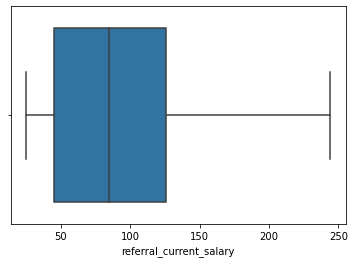

In [95]:
sns.boxplot(x=df.referral_current_salary)

In [96]:
df.referral_current_salary.describe()

count    499.000000
mean      85.252846
std       40.396086
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      244.170000
Name: referral_current_salary, dtype: float64

In [97]:
df.drop(['referral_current_salary_zscore'], axis=1, inplace=True)

In [98]:
### Boxplot method

In [99]:
df.referral_current_salary1.describe()

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: referral_current_salary1, dtype: float64

<AxesSubplot:xlabel='referral_current_salary1'>

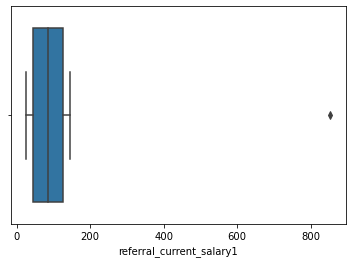

In [100]:
sns.boxplot(x=df.referral_current_salary1)

In [101]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [102]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df['referral_current_salary1'])
print("lower range",lr, "and upper range", ur)

lower range -76.5 and upper range 247.5


In [103]:
df['referral_current_salary1']=np.where(df['referral_current_salary1']>ur,ur,df['referral_current_salary1'])
df['referral_current_salary1']=np.where(df['referral_current_salary1']<lr,lr,df['referral_current_salary1'])

<AxesSubplot:xlabel='referral_current_salary1'>

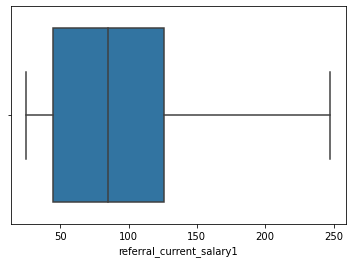

In [104]:
sns.boxplot(x=df.referral_current_salary1)

In [105]:
df.referral_current_salary1.describe()

count    499.000000
mean      85.259519
std       40.422658
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      247.500000
Name: referral_current_salary1, dtype: float64

In [106]:
df.referral_current_salary2.describe()

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: referral_current_salary2, dtype: float64

In [120]:
### Based on business knowledge, we can choose to impute a different value and not higher or lower whisker value 
## We can choose quantile as shown below
q99percent = df.referral_current_salary2.quantile(q=0.99)
q99percent

146.0

#### Encoding

##### Label Encoding

In [108]:
df[cat]

,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined
0,Delhi,Male,EL0,Yes
1,Pune,Male,ML0,Yes
2,Mumbai,Male,EL0,No
3,Bangalore,Male,ML0,Yes
4,Mumbai,Female,EL0,Yes
...,...,...,...,...
494,Pune,Male,EL0,Yes
495,Mumbai,Female,EL0,Yes
496,Mumbai,Male,EL0,Yes
497,Mumbai,Female,EL0,Yes


In [109]:
# convert a column to a category, then use those category values for your label encoding:
df["referral_gender"] =df["referral_gender"].astype('category')
df.dtypes

referral_age                            float64
referral_exp_in_years                   float64
referral_current_salary                 float64
referral_10_th_marks                    float64
referral_12th_marks                     float64
referral_graduation_marks               float64
referral_post_grad_marks                float64
referral_expected_sal                   float64
referral_aptitude_numerical_score       float64
referral_aptitude_verbal_score          float64
referral_aptitude_reasoning_score       float64
referral_Management_Interview_score     float64
referral_HR_Interview_score             float64
Salary offered                          float64
referral_preferred_city                  object
referral_gender                        category
Emp_Salary_Grade                         object
Joined                                   object
referral_current_salary1                float64
referral_current_salary2                float64
dtype: object

In [110]:
df["referral_gender_cat"] = df["referral_gender"].cat.codes
df["referral_gender_cat"].head()

0    1
1    1
2    1
3    1
4    0
Name: referral_gender_cat, dtype: int8

In [111]:
df["referral_gender"].value_counts()

Male      261
Female    238
Name: referral_gender, dtype: int64

In [112]:
df["referral_gender_cat"].value_counts()

1    261
0    238
Name: referral_gender_cat, dtype: int64

In [113]:
## One Hot Encoding

In [114]:
cat.remove('Joined')

In [115]:
df_new =pd.get_dummies(df, columns=cat,drop_first=True)

In [116]:
df_new.head()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,...,Joined,referral_current_salary1,referral_current_salary2,referral_gender_cat,referral_preferred_city_Delhi,referral_preferred_city_Mumbai,referral_preferred_city_Pune,referral_gender_Male,Emp_Salary_Grade_EL0,Emp_Salary_Grade_ML0
0,28.0,5.0,106.0,89.0,72.0,87.0,83.0,123.0,10.00,33.04,...,Yes,106.0,106.0,1,1,0,0,1,1,0
1,26.0,3.0,65.0,63.0,77.0,94.0,85.0,83.0,6.09,27.39,...,Yes,65.0,65.0,1,0,0,1,1,0,1
2,23.0,2.0,45.0,92.0,85.0,84.0,72.0,62.0,41.74,2.61,...,No,45.0,45.0,1,0,1,0,1,1,0
3,29.0,6.0,126.0,60.0,95.0,95.0,67.0,146.0,31.30,9.13,...,Yes,126.0,126.0,1,0,0,0,1,0,1
4,26.0,3.0,65.0,92.0,70.0,80.0,92.0,83.0,25.65,30.43,...,Yes,65.0,65.0,0,0,1,0,0,1,0
